In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
db_possum = pd.read_csv('./datasets/possum.csv')
db_possum.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


<Axes: >

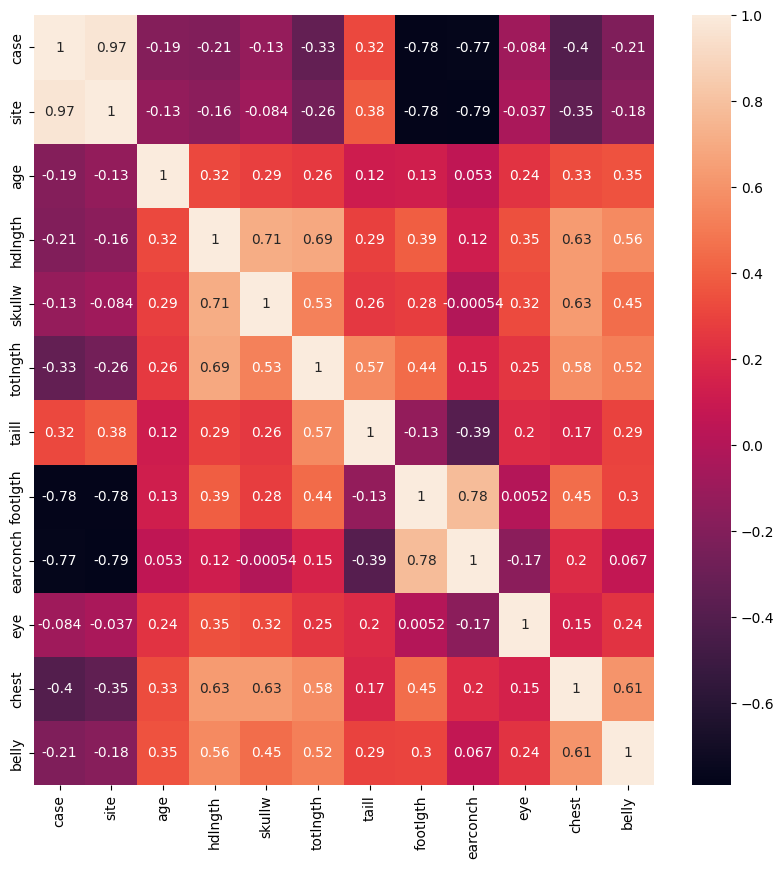

In [9]:
# 5. Cálculo de la matriz de correlación
fig = plt.figure(figsize = (10,10))
sns.heatmap(db_possum[db_possum.keys().drop(['Pop','sex'])].corr(), annot = True)

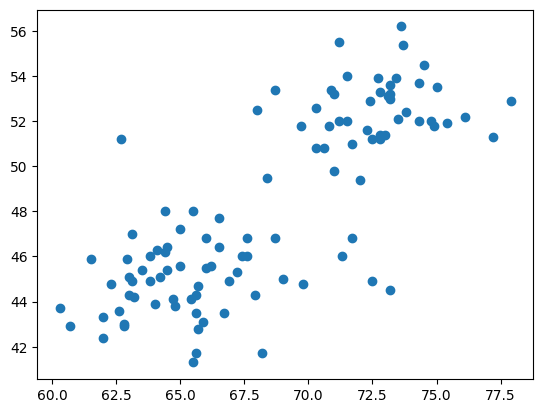

In [10]:
plt.figure()
plt.scatter(db_possum['footlgth'], db_possum['earconch'])
plt.show()

J 324.991195388772
J_ 324.99196549311563
theta_0 = 0.698963, theta_1 = 0.360568
Took %d steps 12


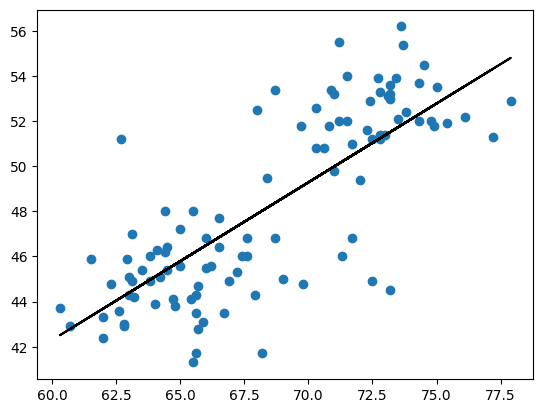

In [67]:
x = db_possum['footlgth']
y = db_possum['earconch']

# Tasa de aprendizaje
eta = 1e-6

# Modelo de regresion lineal simple
yg = lambda theta_0, theta_1, x: theta_0*x + theta_1

# Funcion costo
J = lambda y, yg: (1/2)*np.sum( (y - yg)**2 )

step = 0
epsilon = 1e-3
max_step = 50000
theta_0, theta_1 = np.random.rand(2)

# Metodo de gradiente descendente
while step < max_step:
    theta_0_ = theta_0
    theta_1_ = theta_1

    theta_0 = theta_0 + eta*np.sum( (y - yg(theta_0, theta_1, x))*x )
    theta_1 = theta_1 + eta*np.sum( (y - yg(theta_0, theta_1, x)) )

    if np.abs(J(y, yg(theta_0, theta_1, x)) - J(y, yg(theta_0_, theta_1_, x))) < epsilon:
        print("J", J(y, yg(theta_0, theta_1, x)))
        print("J_", J(y, yg(theta_0_, theta_1_, x)))
        break

    step += 1

print("theta_0 = %f, theta_1 = %f" % (theta_0, theta_1))
print("Took %d steps", step)

plt.figure()
plt.scatter(db_possum['footlgth'], db_possum['earconch'])
plt.plot(db_possum['footlgth'], yg(theta_0, theta_1, db_possum['footlgth']), 'k')
plt.show()

AttributeError: module 'numpy' has no attribute 'eps'